In [1]:
#Decision Tree Classification assignment based on a heart disease dataset.

1. Data Preparation

In [6]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")

# Preview dataset
print(df.head())
print(df.info())
print(df.describe())


   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-n

In [8]:
#2. Exploratory Data Analysis (EDA)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


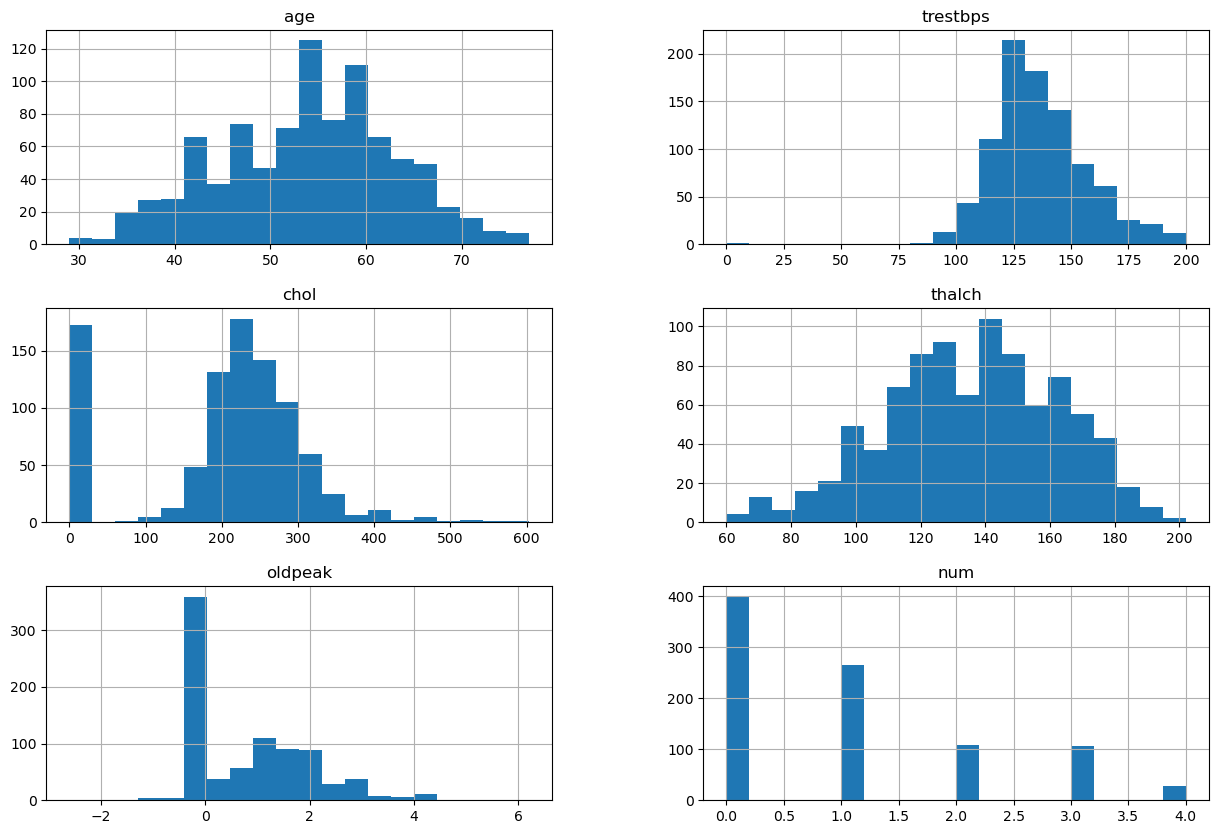

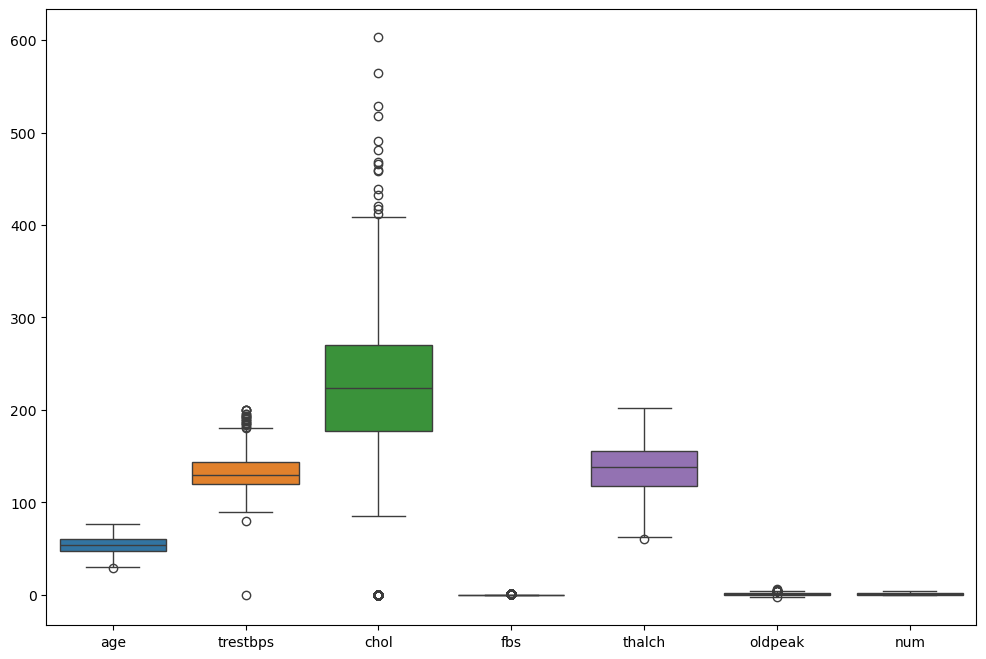

ValueError: could not convert string to float: 'Male'

<Figure size 1000x800 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values
print(df.isnull().sum())

# Distribution of numerical features
df.hist(bins=20, figsize=(15,10))
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [12]:
#3. Feature Engineering

#Convert target (num) into binary (0 = no disease, 1 = disease).

In [14]:
# Convert target to binary
df['target'] = df['num'].apply(lambda x: 0 if x==0 else 1)

# Check categorical columns
categorical = ['sex','cp','fbs','restecg','exang','slope','thal']

# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical, drop_first=True)

print(df.head())


   age  trestbps  chol  thalch  oldpeak  num  target  sex_Male  \
0   63       145   233     150      2.3    0       0      True   
1   41       135   203     132      0.0    0       0      True   
2   57       140   192     148      0.4    0       0      True   
3   52       118   186     190      0.0    0       0      True   
4   57       110   201     126      1.5    0       0      True   

   cp_atypical angina  cp_non-anginal  ...  fbs_True  restecg_normal  \
0               False           False  ...      True           False   
1                True           False  ...     False            True   
2               False           False  ...     False            True   
3               False           False  ...     False           False   
4               False           False  ...     False            True   

   restecg_st-t abnormality  exang_True  exang_FALSE  exang_TURE  slope_flat  \
0                     False       False        False       False       False   
1         

In [16]:
#4. Decision Tree Classification

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Split data
X = df.drop(['num','target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7252747252747253
Precision: 0.7471264367816092
Recall: 0.6989247311827957
F1 Score: 0.7222222222222222
ROC-AUC: 0.7258668599734204

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        89
           1       0.75      0.70      0.72        93

    accuracy                           0.73       182
   macro avg       0.73      0.73      0.73       182
weighted avg       0.73      0.73      0.73       182



In [20]:
#5. Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Retrain with best parameters
best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7768729333963156
Tuned Accuracy: 0.7912087912087912


In [24]:
#6. Model Evaluation & Visualization

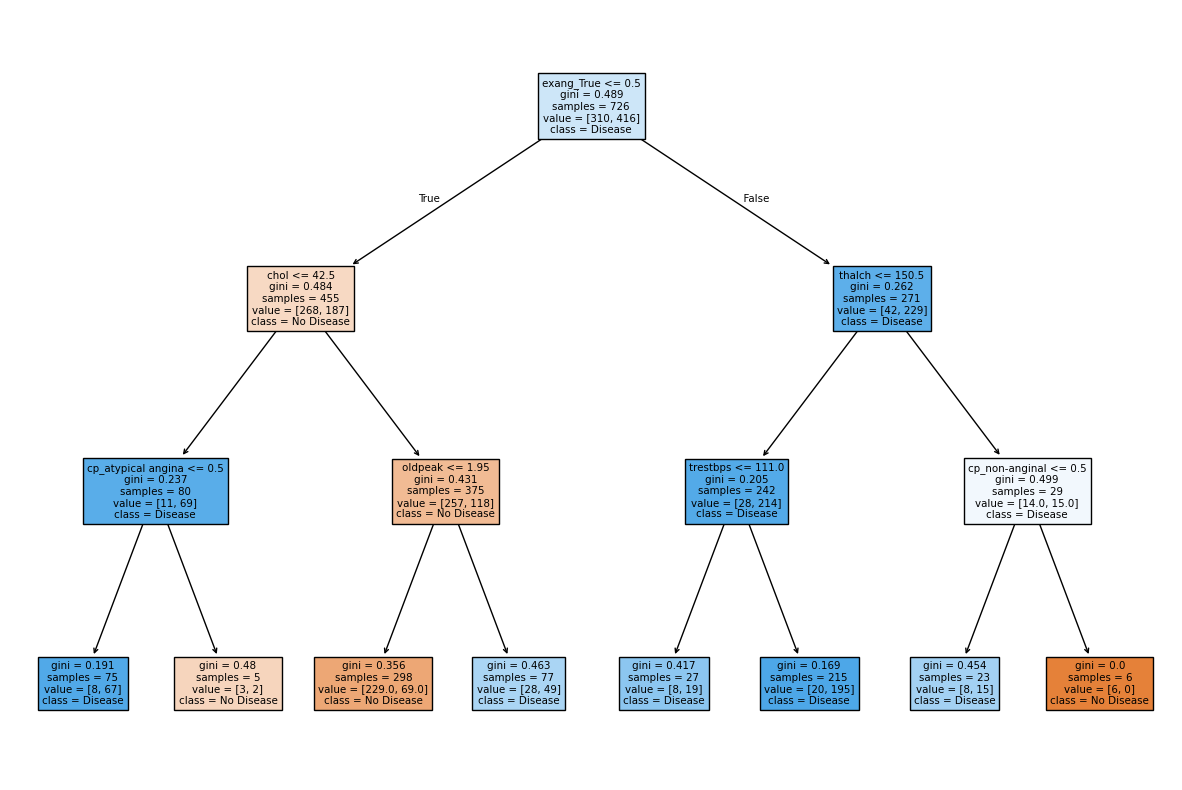

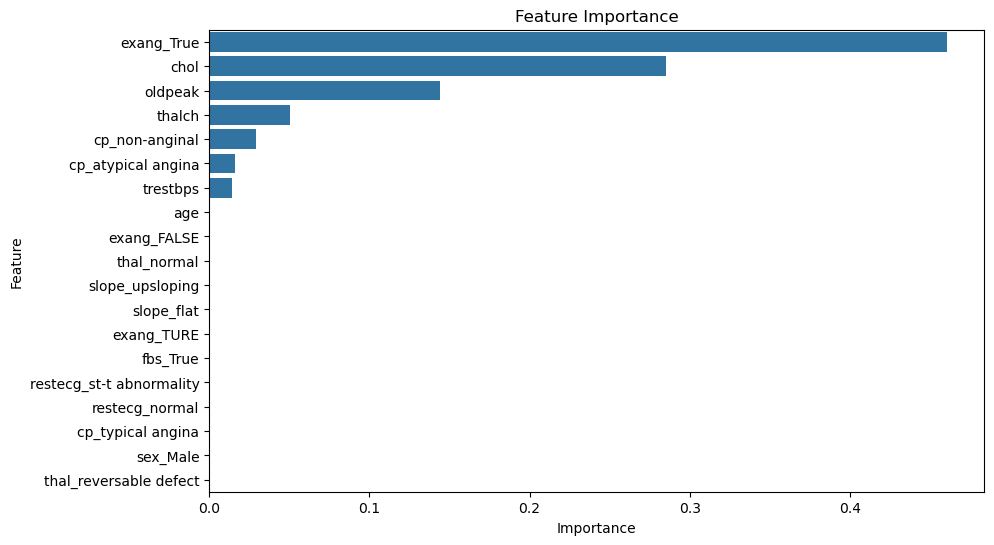

In [26]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(best_dt, feature_names=X.columns, class_names=["No Disease","Disease"], filled=True)
plt.show()

# Feature Importance
importances = pd.DataFrame({'Feature':X.columns, 'Importance':best_dt.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Feature Importance")
plt.show()


In [28]:
#Interview Questions & Answers


1. Common hyperparameters of decision trees and their effect:

max_depth → Maximum depth of tree (limits overfitting).

min_samples_split → Minimum samples required to split a node (higher = prevents overfitting).

min_samples_leaf → Minimum samples required in a leaf node (smoothing effect).

criterion → Function to measure split quality (gini or entropy).

max_features → Number of features considered when splitting (controls randomness).

2. Label Encoding vs One-Hot Encoding

Label Encoding → Converts categories to integers (e.g., Male=1, Female=0). Useful for ordinal data.

One-Hot Encoding → Creates dummy columns (e.g., Gender_Male=1, Gender_Female=0). Useful for nominal data.